This is a brief introduction to Pandas. It is definitely not the first. Highly recommended resources for further reading include:   
- **Tutorials from Stern's "Dealing with Data" course**:    
https://github.com/ipeirotis/dealing_with_data 
- ** Python for Data Analysis**, by Wes McKinney (the creator of Pandas):    
http://shop.oreilly.com/product/0636920023784.do
- ** StackOverflow **:     
http://stackoverflow.com/questions/tagged/pandas
- ** The Pandas documentation **:     
http://pandas.pydata.org/pandas-docs/stable/
- ** Chris Albon's blog**, which has consistently useful code snippets:   
http://chrisalbon.com/#Python

# 0. Setup
First things first: let's load our libraries.

In [1]:
import pandas as pd               # For working with dataframes
import numpy as np                # For numeric and scientific computations
import matplotlib.pyplot as plt   # For graphing
import urllib                     # For downloading content from a URL
import zipfile                    # For unzipping files

%matplotlib inline

Did you install pandas?

In [2]:
# We can access the command line with an exclamation point, like this:
!pip install pandas

You are using pip version 9.0.0, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Now, download the file from the web

In [3]:
source = "http://nhts.ornl.gov/2009/download/TripChainingCSV.zip"
urllib.urlretrieve(source, "chntrp09.zip")

('chntrp09.zip', <httplib.HTTPMessage instance at 0x00000000043F6A48>)

And, unzip it

In [4]:
zip_ref = zipfile.ZipFile("chntrp09.zip", 'r')
zip_ref.extractall("chntrp09")
zip_ref.close()

OK, now, we can get started.

# 1. Importing CSV data

We read in a csv file like this:

In [5]:
trip_data = pd.read_csv("chntrp09/TripChainingCSV/chntrp09.csv")

What happened?

In [6]:
trip_data.tail(2)

,HOUSEID,PERSONID,TDTRPNUM,WTTRDFIN,TOUR,TOUR_SEG,TOURTYPE,TRPCNT,STOPS,TOUR_FLG
1164975,69999811,1,8,296027.5136,3,1,HW,1,0,0
1164976,69999811,1,9,296027.5136,4,1,WH,1,0,0


## a. Limit the number of rows read

In [7]:
trip_data = pd.read_csv("chntrp09/TripChainingCSV/chntrp09.csv", nrows = 1)
trip_data.head()

,HOUSEID,PERSONID,TDTRPNUM,WTTRDFIN,TOUR,TOUR_SEG,TOURTYPE,TRPCNT,STOPS,TOUR_FLG
0,20000017,1,1,68170.670425,1,1,HO,1,0,0


## b. Choose which columns to import

In [8]:
trip_data = pd.read_csv("chntrp09/TripChainingCSV/chntrp09.csv", usecols=['HOUSEID', 'PERSONID'] )
trip_data.head()

,HOUSEID,PERSONID
0,20000017,1
1,20000017,1
2,20000017,1
3,20000017,1
4,20000017,1


## c. Import piecewise
This is often useful if you have a plan for collapsing data in mind.   
For example, you might be counting by groups, so you can count by group within each chunk, and then sum over all chunks.

In [9]:
counter = 0

for trip_data_chunk in pd.read_csv("chntrp09/TripChainingCSV/chntrp09.csv", 
                                   usecols=['HOUSEID', 'PERSONID'],
                                  chunksize=300000):
    
    print "Reading chunk", counter
    counter +=1

Reading chunk 0
Reading chunk 1
Reading chunk 2
Reading chunk 3


In [10]:
### How would you read the first 2,000 rows of the 'TOUR' and 'TOUR_SEG' columns?

<font color = "white"> 

trip_data = pd.read_csv("chntrp09/TripChainingCSV/chntrp09.csv", nrows = 2000, usecols=['TOUR', 'TOUR_SEG'])

# 2. Inspecting the data

In [11]:
trip_data = pd.read_csv("chntrp09/TripChainingCSV/chntrp09.csv")

## a. How many rows and columns?

In [12]:
trip_data.shape

(1164977, 10)

## b. What are the columns?

In [13]:
trip_data.columns

Index([u'HOUSEID', u'PERSONID', u'TDTRPNUM', u'WTTRDFIN', u'TOUR', u'TOUR_SEG',
       u'TOURTYPE', u'TRPCNT', u'STOPS', u'TOUR_FLG'],
      dtype='object')

## c. What are the data types of the columns?

In [14]:
trip_data.dtypes

HOUSEID       int64
PERSONID      int64
TDTRPNUM      int64
WTTRDFIN    float64
TOUR          int64
TOUR_SEG      int64
TOURTYPE     object
TRPCNT        int64
STOPS         int64
TOUR_FLG      int64
dtype: object

## d.  How many entries in the columns?

In [15]:
trip_data.count()

HOUSEID     1164977
PERSONID    1164977
TDTRPNUM    1164977
WTTRDFIN    1164977
TOUR        1164977
TOUR_SEG    1164977
TOURTYPE    1164977
TRPCNT      1164977
STOPS       1164977
TOUR_FLG    1164977
dtype: int64

## e. A brief summary of the columns?

In [16]:
trip_data.describe()

,HOUSEID,PERSONID,TDTRPNUM,WTTRDFIN,TOUR,TOUR_SEG,TRPCNT,STOPS,TOUR_FLG
count,1.164977e+06,1.164977e+06,1.164977e+06,1.164977e+06,1.164977e+06,1.164977e+06,1.164977e+06,1.164977e+06,1.164977e+06
mean,4.495692e+07,1.768512e+00,3.497851e+00,3.358439e+05,2.417918e+00,1.409985e+00,1.819970e+00,8.199698e-01,3.441441e-01
std,1.443009e+07,1.018158e+00,2.466440e+00,9.269577e+05,1.481951e+00,8.090722e-01,1.177166e+00,1.177166e+00,4.750886e-01
min,2.000002e+07,1.000000e+00,1.000000e+00,3.687203e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.242965e+07,1.000000e+00,2.000000e+00,3.543230e+04,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.494349e+07,1.000000e+00,3.000000e+00,9.556187e+04,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,5.746568e+07,2.000000e+00,5.000000e+00,2.590409e+05,3.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
max,6.999981e+07,1.300000e+01,3.200000e+01,2.705896e+07,2.300000e+01,2.100000e+01,2.100000e+01,2.000000e+01,1.000000e+00


# 3. Browsing and selecting data

In [17]:
trip_data.head()

,HOUSEID,PERSONID,TDTRPNUM,WTTRDFIN,TOUR,TOUR_SEG,TOURTYPE,TRPCNT,STOPS,TOUR_FLG
0,20000017,1,1,68170.670425,1,1,HO,1,0,0
1,20000017,1,2,68170.670425,2,1,OO,1,0,0
2,20000017,1,3,68170.670425,3,1,OH,1,0,0
3,20000017,1,4,68170.670425,4,1,HO,1,0,0
4,20000017,1,5,68170.670425,5,1,OH,1,0,0


## a. Select columns
### Single

In [18]:
trip_data.HOUSEID.head()

0    20000017
1    20000017
2    20000017
3    20000017
4    20000017
Name: HOUSEID, dtype: int64

In [19]:
trip_data['HOUSEID'].head()

0    20000017
1    20000017
2    20000017
3    20000017
4    20000017
Name: HOUSEID, dtype: int64

### Multiple

In [20]:
trip_data[['HOUSEID','TOUR']].head()

,HOUSEID,TOUR
0,20000017,1
1,20000017,2
2,20000017,3
3,20000017,4
4,20000017,5


## c. Select rows
### Single

In [21]:
trip_data.loc[0]

HOUSEID     20000017
PERSONID           1
TDTRPNUM           1
WTTRDFIN     68170.7
TOUR               1
TOUR_SEG           1
TOURTYPE          HO
TRPCNT             1
STOPS              0
TOUR_FLG           0
Name: 0, dtype: object

### Mutiple

In [22]:
trip_data.loc[[0,6]]

,HOUSEID,PERSONID,TDTRPNUM,WTTRDFIN,TOUR,TOUR_SEG,TOURTYPE,TRPCNT,STOPS,TOUR_FLG
0,20000017,1,1,68170.670425,1,1,HO,1,0,0
6,20000017,2,2,69589.496462,1,2,HO,2,1,1


In [23]:
trip_data.loc[0:6]

,HOUSEID,PERSONID,TDTRPNUM,WTTRDFIN,TOUR,TOUR_SEG,TOURTYPE,TRPCNT,STOPS,TOUR_FLG
0,20000017,1,1,68170.670425,1,1,HO,1,0,0
1,20000017,1,2,68170.670425,2,1,OO,1,0,0
2,20000017,1,3,68170.670425,3,1,OH,1,0,0
3,20000017,1,4,68170.670425,4,1,HO,1,0,0
4,20000017,1,5,68170.670425,5,1,OH,1,0,0
5,20000017,2,1,69589.496462,1,1,HO,2,1,1
6,20000017,2,2,69589.496462,1,2,HO,2,1,1


## e. Select cells
### Single

In [24]:
trip_data.loc[3, "TDTRPNUM"]

4

### Multiple

In [25]:
trip_data.loc[3:7, "TDTRPNUM":'TOUR']

,TDTRPNUM,WTTRDFIN,TOUR
3,4,68170.670425,4
4,5,68170.670425,5
5,1,69589.496462,1
6,2,69589.496462,1
7,3,69589.496462,2


## f. Select subset

In [26]:
trip_data[trip_data.TOUR==2].head()

,HOUSEID,PERSONID,TDTRPNUM,WTTRDFIN,TOUR,TOUR_SEG,TOURTYPE,TRPCNT,STOPS,TOUR_FLG
1,20000017,1,2,68170.670425,2,1,OO,1,0,0
7,20000017,2,3,69589.496462,2,1,OO,2,1,1
8,20000017,2,4,69589.496462,2,2,OO,2,1,1
15,20000231,1,3,522885.472560,2,1,WH,1,0,0
19,20000521,1,2,117718.426110,2,1,OH,3,2,1


In [27]:
trip_data[(trip_data.TOUR==2) & (trip_data.STOPS==0)].head()

,HOUSEID,PERSONID,TDTRPNUM,WTTRDFIN,TOUR,TOUR_SEG,TOURTYPE,TRPCNT,STOPS,TOUR_FLG
1,20000017,1,2,68170.670425,2,1,OO,1,0,0
15,20000231,1,3,522885.472560,2,1,WH,1,0,0
23,20000521,2,2,132561.492020,2,1,OH,1,0,0
29,20001603,1,2,37531.737404,2,1,OO,1,0,0
47,20001649,1,4,290512.795790,2,1,OH,1,0,0


In [28]:
trip_data.loc[trip_data.HOUSEID == 20000231, 'WTTRDFIN']

13    522885.47256
14    522885.47256
15    522885.47256
16    522885.47256
17    522885.47256
Name: WTTRDFIN, dtype: float64

In [29]:
### How would you select the first 20 rows of 'WTTRDFIN' and 'PERSONID'?

<font color="white"> 

trip_data[:20, ['WTTRDFIN', 'PERSONID']] 

# 4. Cleaning the data

## a. Edit column names
### Systematically

In [30]:
trip_data.columns = [c.lower() for c in trip_data.columns]
trip_data.head()

,houseid,personid,tdtrpnum,wttrdfin,tour,tour_seg,tourtype,trpcnt,stops,tour_flg
0,20000017,1,1,68170.670425,1,1,HO,1,0,0
1,20000017,1,2,68170.670425,2,1,OO,1,0,0
2,20000017,1,3,68170.670425,3,1,OH,1,0,0
3,20000017,1,4,68170.670425,4,1,HO,1,0,0
4,20000017,1,5,68170.670425,5,1,OH,1,0,0


### Manually

In [31]:
trip_data.rename(columns={'houseid': 'house_id',
                         'personid': 'person_id'}, inplace = True)
trip_data.head()

,house_id,person_id,tdtrpnum,wttrdfin,tour,tour_seg,tourtype,trpcnt,stops,tour_flg
0,20000017,1,1,68170.670425,1,1,HO,1,0,0
1,20000017,1,2,68170.670425,2,1,OO,1,0,0
2,20000017,1,3,68170.670425,3,1,OH,1,0,0
3,20000017,1,4,68170.670425,4,1,HO,1,0,0
4,20000017,1,5,68170.670425,5,1,OH,1,0,0


## b. Change column values

In [32]:
trip_data.trpcnt.describe()

count    1.164977e+06
mean     1.819970e+00
std      1.177166e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.100000e+01
Name: trpcnt, dtype: float64

In [33]:
trip_data.loc[trip_data.trpcnt==21, 'trpcnt'] = 999

In [34]:
trip_data.trpcnt.describe()

count    1.164977e+06
mean     1.837599e+00
std      4.393561e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.990000e+02
Name: trpcnt, dtype: float64

In [35]:
trip_data['trpcnt_recoded'] = trip_data['trpcnt'].replace({999:'missing', 1:'only one'})

In [36]:
trip_data.trpcnt_recoded.value_counts()

only one    587983
2           369546
3           116529
4            50568
5            21915
6             9216
7             4452
8             2096
9             1035
10             650
11             374
13             195
12             192
14              56
16              48
15              45
missing         21
20              20
19              19
17              17
Name: trpcnt_recoded, dtype: int64

## c. Generate new columns

In [37]:
trip_data['trpcnt_recoded'] = np.where(trip_data.trpcnt>10, "A lot", "A little")

In [38]:
pd.crosstab(trip_data['trpcnt'], trip_data['trpcnt_recoded'])

trpcnt_recoded,A little,A lot
trpcnt,,
1,587983,0
2,369546,0
3,116529,0
4,50568,0
5,21915,0
6,9216,0
7,4452,0
8,2096,0
9,1035,0


In [39]:
trip_data['stops100'] = trip_data.stops * 100
trip_data['stops3'] = trip_data.stops ** 2


trip_data[['stops', 'stops100', 'stops3']].head(20)

,stops,stops100,stops3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,100,1
6,1,100,1
7,1,100,1
8,1,100,1
9,1,100,1


## d. Insert missing values

In [40]:
trip_data.loc[trip_data.stops==0,'stops'] = np.nan

In [41]:
trip_data.stops.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: stops, dtype: float64

### !!!! Caution: Missing values get weird
#### Nulls are not equal

In [42]:
trip_data.loc[0].stops

nan

In [43]:
trip_data.loc[1].stops

nan

In [44]:
trip_data.loc[0].stops == trip_data.loc[1].stops

False

In [45]:
pd.isnull(trip_data.loc[1].stops)

True

#### For this reason, we need special option to select them

In [46]:
trip_data[trip_data.stops==np.nan]

,house_id,person_id,tdtrpnum,wttrdfin,tour,tour_seg,tourtype,trpcnt,stops,tour_flg,trpcnt_recoded,stops100,stops3


In [47]:
trip_data[trip_data.stops.isnull()].head()

,house_id,person_id,tdtrpnum,wttrdfin,tour,tour_seg,tourtype,trpcnt,stops,tour_flg,trpcnt_recoded,stops100,stops3
0,20000017,1,1,68170.670425,1,1,HO,1,NaN,0,A little,0,0
1,20000017,1,2,68170.670425,2,1,OO,1,NaN,0,A little,0,0
2,20000017,1,3,68170.670425,3,1,OH,1,NaN,0,A little,0,0
3,20000017,1,4,68170.670425,4,1,HO,1,NaN,0,A little,0,0
4,20000017,1,5,68170.670425,5,1,OH,1,NaN,0,A little,0,0


#### They don't appear to be ordered

In [48]:
trip_data.loc[0].stops>0

False

In [49]:
trip_data.loc[0].stops<0

False

In [50]:
trip_data.loc[0].stops==0

False

# 5. Reshaping the data

## a. Calculate group characteristics

In [51]:
trip_data.groupby(['house_id', 'person_id']).mean().head()

tdtrpnum       wttrdfin   tour  tour_seg  trpcnt  stops  \
house_id person_id                                                            
20000017 1               3.0   68170.670425  3.000     1.000    1.00    NaN   
         2               4.5   69589.496462  2.625     1.375    1.75    1.0   
20000231 1               3.0  522885.472560  2.200     1.200    1.40    1.0   
20000521 1               2.5  117718.426110  1.750     1.750    2.50    2.0   
         2               1.5  132561.492020  1.500     1.000    1.00    NaN   

                    tour_flg  stops100  stops3  
house_id person_id                              
20000017 1              0.00       0.0    0.00  
         2              0.75      75.0    0.75  
20000231 1              0.40      40.0    0.40  
20000521 1              0.75     150.0    3.00  
         2              0.00       0.0    0.00

## b. Pivot

In [52]:
trip_data.trpcnt.unique()

array([  1,   2,   3,   4,   5,   7,   6,   8,   9,  13,  10,  15,  11,
        12,  19,  14,  20,  16, 999,  17], dtype=int64)

In [53]:
trip_data.groupby(['house_id', 'person_id']).mean() #[['tdtrpnum', 'trpcnt']].head()

tdtrpnum      wttrdfin      tour  tour_seg    trpcnt  \
house_id person_id                                                         
20000017 1          3.000000  6.817067e+04  3.000000  1.000000  1.000000   
         2          4.500000  6.958950e+04  2.625000  1.375000  1.750000   
20000231 1          3.000000  5.228855e+05  2.200000  1.200000  1.400000   
20000521 1          2.500000  1.177184e+05  1.750000  1.750000  2.500000   
         2          1.500000  1.325615e+05  1.500000  1.000000  1.000000   
20001283 1          2.500000  6.461012e+05  1.750000  1.750000  2.500000   
20001603 1          3.500000  3.753174e+04  3.166667  1.166667  1.333333   
         2          5.500000  4.086633e+04  4.300000  1.200000  1.400000   
20001649 1          4.500000  2.905128e+05  2.750000  1.500000  2.000000   
         2          3.500000  3.132873e+05  2.500000  1.333333  1.666667   
20002413 1          1.500000  3.535598e+04  1.500000  1.000000  1.000000   
         2          1.500000  1.127163e+05  1.500000  1.000000  1.000000   
20002440 2          3.500000  1.048044e+05  2.000000  1.500000  2.000000   
20002570 1          5.666667  6.533636e+04  2.555556  1.888889  2.777778   
         3          2.500000  9.883542e+04  2.500000  1.000000  1.000000   
         4          6.375000  1.647840e+05  3.000000  1.500000  2.000000   
20002888 1          1.500000  2.813046e+04  1.500000  1.000000  1.000000   
20003401 1          1.500000  4.684545e+06  1.000000  1.500000  2.000000   
20004480 1          5.000000  9.603121e+04  1.666667  2.333333  3.666667   
         2          2.500000  1.256243e+05  2.500000  1.000000  1.000000   
         3          5.000000  1.529624e+05  2.555556  1.666667  2.333333   
20004837 1          2.000000  5.039269e+05  1.333333  1.333333  1.666667   
         2          3.500000  7.335344e+05  2.833333  1.333333  1.666667   
         3          1.500000  5.742319e+05  1.500000  1.000000  1.000000   
20005320 1          1.500000  6.708881e+04  1.500000  1.000000  1.000000   
         2          3.000000  7.236153e+04  2.200000  1.200000  1.400000   
20005599 1          1.500000  1.040048e+05  1.500000  1.000000  1.000000   
20005807 1          4.000000  5.535021e+04  1.857143  1.714286  2.428571   
20006233 1          3.500000  9.643176e+05  1.166667  2.666667  4.333333   
20006381 1          1.500000  2.955194e+04  1.500000  1.000000  1.000000   
...                      ...           ...       ...       ...       ...   
69995729 1          1.500000  2.415686e+05  1.000000  1.500000  2.000000   
         2          2.000000  2.807599e+05  1.000000  2.000000  3.000000   
69995804 1          3.500000  3.636619e+05  3.333333  1.166667  1.333333   
69996481 1          2.000000  5.261590e+05  1.666667  1.333333  1.666667   
69996584 1          5.500000  4.618733e+05  4.400000  1.400000  1.800000   
         2          2.000000  4.638907e+05  2.000000  1.000000  1.000000   
69996632 1          4.500000  4.020575e+05  1.750000  2.250000  3.500000   
         2          1.500000  5.059800e+05  1.500000  1.000000  1.000000   
69996847 1          2.500000  5.231059e+04  1.750000  1.250000  1.500000   
         2          1.500000  5.667649e+04  1.500000  1.000000  1.000000   
69996856 1          1.500000  8.845223e+03  1.500000  1.000000  1.000000   
         2          4.500000  5.501940e+03  3.875000  1.125000  1.250000   
69997321 1          2.000000  1.031459e+05  1.666667  1.333333  1.666667   
69997611 1          3.500000  8.690007e+04  2.333333  1.500000  2.000000   
         2          3.500000  1.103828e+05  2.333333  1.500000  2.000000   
69998092 1          2.500000  4.364017e+04  2.500000  1.000000  1.000000   
         2          6.181818  4.653713e+04  2.363636  2.181818  3.363636   
         3          2.500000  5.841258e+04  2.500000  1.000000  1.000000   
         4          1.500000  5.841258e+04  1.500000  1.000000  1.000000   
69998300 1          3.000000  2.724617e+05  1.800000  1.400000  1.80

In [54]:
trip_data.groupby(['house_id', 'person_id']).mean()[['tdtrpnum', 'trpcnt']].unstack().head()

tdtrpnum                                      ... trpcnt          \
person_id       1    2   3   4   5   6   7   8   9   10 ...     4   5   6    
house_id                                                ...                  
20000017       3.0  4.5 NaN NaN NaN NaN NaN NaN NaN NaN ...    NaN NaN NaN   
20000231       3.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN ...    NaN NaN NaN   
20000521       2.5  1.5 NaN NaN NaN NaN NaN NaN NaN NaN ...    NaN NaN NaN   
20001283       2.5  NaN NaN NaN NaN NaN NaN NaN NaN NaN ...    NaN NaN NaN   
20001603       3.5  5.5 NaN NaN NaN NaN NaN NaN NaN NaN ...    NaN NaN NaN   

                                       
person_id  7   8   9   10  11  12  13  
house_id                               
20000017  NaN NaN NaN NaN NaN NaN NaN  
20000231  NaN NaN NaN NaN NaN NaN NaN  
20000521  NaN NaN NaN NaN NaN NaN NaN  
20001283  NaN NaN NaN NaN NaN NaN NaN  
20001603  NaN NaN NaN NaN NaN NaN NaN  

[5 rows x 26 columns]

## c. Join

In [55]:
trip_data[['house_id','person_id', 'tdtrpnum']].merge(trip_data[['house_id','person_id', 'trpcnt',  'tdtrpnum']],
                                                    on=['house_id','person_id'], suffixes=["_l", "_r"]).head()

,house_id,person_id,tdtrpnum_l,trpcnt,tdtrpnum_r
0,20000017,1,1,1,1
1,20000017,1,1,1,2
2,20000017,1,1,1,3
3,20000017,1,1,1,4
4,20000017,1,1,1,5


# 6. Inspecting the data 

In [56]:
trip_data.head()

,house_id,person_id,tdtrpnum,wttrdfin,tour,tour_seg,tourtype,trpcnt,stops,tour_flg,trpcnt_recoded,stops100,stops3
0,20000017,1,1,68170.670425,1,1,HO,1,NaN,0,A little,0,0
1,20000017,1,2,68170.670425,2,1,OO,1,NaN,0,A little,0,0
2,20000017,1,3,68170.670425,3,1,OH,1,NaN,0,A little,0,0
3,20000017,1,4,68170.670425,4,1,HO,1,NaN,0,A little,0,0
4,20000017,1,5,68170.670425,5,1,OH,1,NaN,0,A little,0,0


## a. Get unique values

In [57]:
trip_data.tour.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23], dtype=int64)

## b. Count values

In [58]:
trip_data.stops.value_counts()

1.0     369546
2.0     116529
3.0      50568
4.0      21915
5.0       9216
6.0       4452
7.0       2096
8.0       1035
9.0        650
10.0       374
12.0       195
11.0       192
13.0        56
15.0        48
14.0        45
20.0        21
19.0        20
18.0        19
16.0        17
Name: stops, dtype: int64

In [59]:
### How would you count unique values of stops if trpcnt_recoded is "A lot"?

<font color="white"> 

In [60]:
trip_data.loc[trip_data.trpcnt_recoded=="A lot", "stops"].value_counts()

10.0    374
12.0    195
11.0    192
13.0     56
15.0     48
14.0     45
20.0     21
19.0     20
18.0     19
16.0     17
Name: stops, dtype: int64

## b. Plot
### Histogram

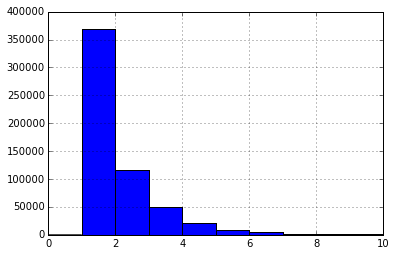

In [61]:
trip_data.stops.hist(range=[0,10], bins=10)

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


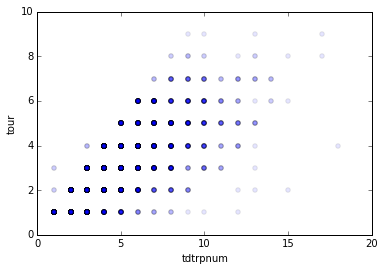

In [62]:
trip_data.sample(5000).plot(kind='scatter', x='tdtrpnum', y='tour', alpha=0.1)

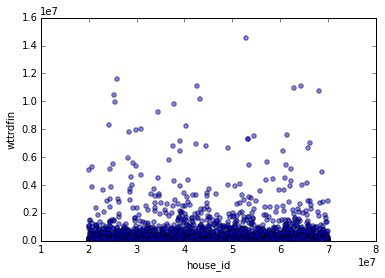

In [63]:
trip_data.sample(5000).plot(kind='scatter', x='house_id', y='wttrdfin', alpha=0.5, ylim=0)

In [64]:
trip_data['little'] = np.where(trip_data.trpcnt_recoded=="A little", 1, 0)
trip_data['lot'] = np.where(trip_data.trpcnt_recoded=="A lot", 1, 0)

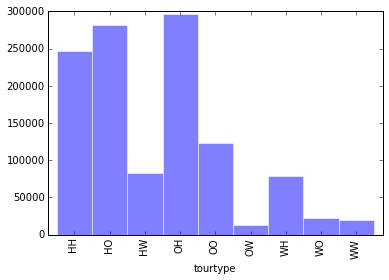

In [65]:
trip_data.groupby('tourtype').count()['house_id'].plot(kind='bar', width=1, alpha=0.5, edgecolor='white') #[['little', 'lot']].plot(kind='bar')

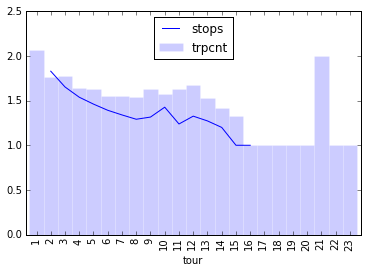

In [66]:
trip_data.groupby('tour').mean()['stops'].plot(kind='line', legend='stops')
trip_data.groupby('tour').mean()['trpcnt'].plot(kind='bar', legend ='trpcnt', alpha=0.2, edgecolor='white', width=1)

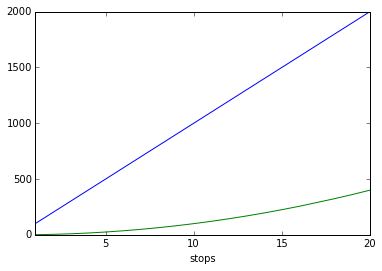

In [67]:
trip_data.groupby('stops').mean()['stops100'].plot(kind='line')
trip_data.groupby('stops').mean()['stops3'].plot(kind='line')